<h2 id="exercises">Explore Exercises</h2>
<p>Do your work for this exercise in a file named <code>explore</code>.</p>


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re

In [2]:
import prepare_spam

In [3]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

1. Spam Data

<li>Load the spam data set.</li>


In [4]:
spam_df = pd.read_csv('spam_clean.csv')
spam_df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
spam_df.rename(columns={'text': 'original'}, inplace=True)


In [6]:
spam_df.head()

,label,original
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
spam_df = prepare_spam.prep_article_data(spam_df, 'original', extra_words = ['u', '2', 'ur', "'", '4'])

In [8]:
spam_df.head()

,label,original,clean,stemmed,lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,go jurong point crazi avail onli bugi n great ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif oni,ok lar joke wif oni,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts 21s...,free entri wkli comp win fa cup final tkt 21st...,free entry wkly comp win fa cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,dun say early hor c already say,dun say earli hor c alreadi say,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,nah think goe usf live around though,nah think go usf life around though


<li>Create and explore bigrams for the spam data. Visualize them with a word
   cloud. How do they compare with the ham bigrams?</li>


In [9]:
df=spam_df.copy()

In [10]:
# Split out word lists

# combine all messages in single string by label

original_ham_words =(' '.join(df[df.label == 'ham'].original))
original_spam_words =(' '.join(df[df.label == 'spam'].original))
original_all_words = (' '.join(df.original))

In [11]:
clean_ham_words =(' '.join(df[df.label == 'ham'].clean))
clean_spam_words =(' '.join(df[df.label == 'spam'].clean))
clean_all_words = (' '.join(df.clean))

In [12]:
lemmatized_ham_words =(' '.join(df[df.label == 'ham'].lemmatized))
lemmatized_spam_words =(' '.join(df[df.label == 'spam'].lemmatized))
lemmatized_all_words = (' '.join(df.lemmatized))

In [13]:
clean_ham_freq = pd.Series(clean_ham_words.split()).value_counts()
clean_spam_freq = pd.Series(clean_spam_words.split()).value_counts()
clean_all_freq = pd.Series(clean_all_words.split()).value_counts()

In [14]:
lemmatized_ham_freq = pd.Series(lemmatized_ham_words.split()).value_counts()
lemmatized_spam_freq = pd.Series(lemmatized_spam_words.split()).value_counts()
lemmatized_all_freq = pd.Series(lemmatized_all_words.split()).value_counts()

In [15]:
clean_ham_freq.head(20)

get      303
ltgt     276
ok       272
go       247
know     232
got      231
like     229
call     229
come     224
good     222
day      198
time     189
love     186
going    167
one      163
want     163
home     160
lor      160
need     156
sorry    153
dtype: int64

In [16]:
lemmatized_ham_freq.head(20)

get      314
ltgt     276
go       273
ok       272
come     242
know     241
call     241
like     232
got      231
day      225
wa       225
good     223
time     213
love     194
want     183
need     171
one      170
going    167
home     160
lor      160
dtype: int64

In [17]:
word_counts = (pd.concat([lemmatized_all_freq, lemmatized_ham_freq, lemmatized_spam_freq], axis=1, sort=True)
                .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all,ham,spam
0,3,0,3
008704050406,2,0,2
0089my,1,0,1
0121,1,0,1
01223585236,1,0,1


Look at most frequently used words

In [18]:
word_counts.sort_values(by='all', ascending=False).head(10)


,all,ham,spam
call,600,241,359
get,397,314,83
go,304,273,31
ok,277,272,5
ltgt,276,276,0
free,275,59,216
know,267,241,26
day,252,225,27
come,247,242,5
like,245,232,13


Find words unique to spam of ham

In [19]:
pd.concat([word_counts[word_counts.spam == 0].sort_values(by='ham').tail(6),
           word_counts[word_counts.ham == 0].sort_values(by='spam').tail(6)])

,all,ham,spam
ask,88,88,0
say,118,118,0
da,132,132,0
later,134,134,0
lor,160,160,0
ltgt,276,276,0
awarded,38,0,38
18,43,0,43
guaranteed,50,0,50
tone,73,0,73


Text(0.5, 1.0, 'Proportion of Spam vs Ham for the 20 most common words')

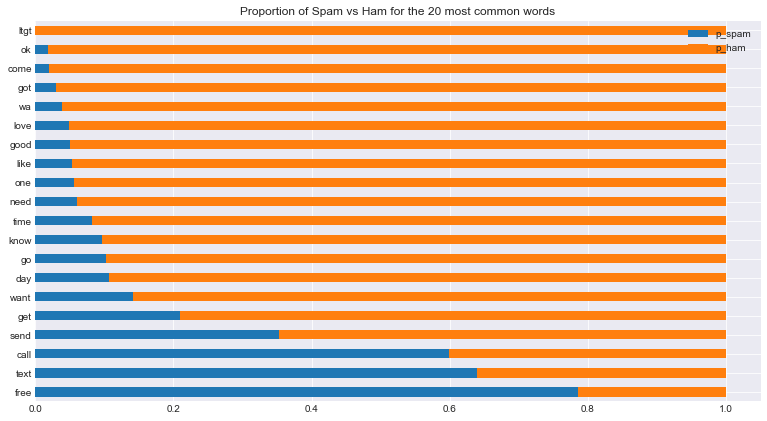

In [20]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_spam=word_counts.spam / word_counts['all'],
         p_ham=word_counts.ham / word_counts['all'])
 .sort_values(by='all')
 [['p_spam', 'p_ham']]
 .tail(20)
 .sort_values('p_ham')
 .plot.barh(stacked=True))

plt.title('Proportion of Spam vs Ham for the 20 most common words')

Text(0.5, 1.0, 'Top 10 most common spam bigrams - Cleaned text')

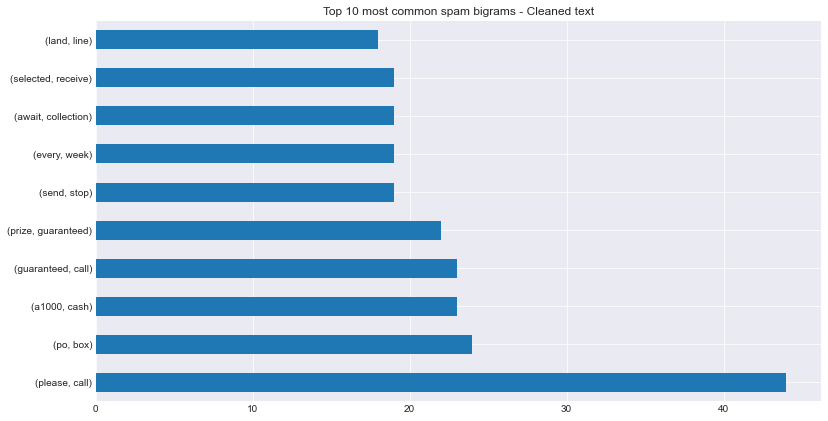

In [21]:
pd.Series(nltk.bigrams(clean_spam_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam bigrams - Cleaned text')

Text(0.5, 1.0, 'Top 10 most common ham bigrams - Cleaned text')

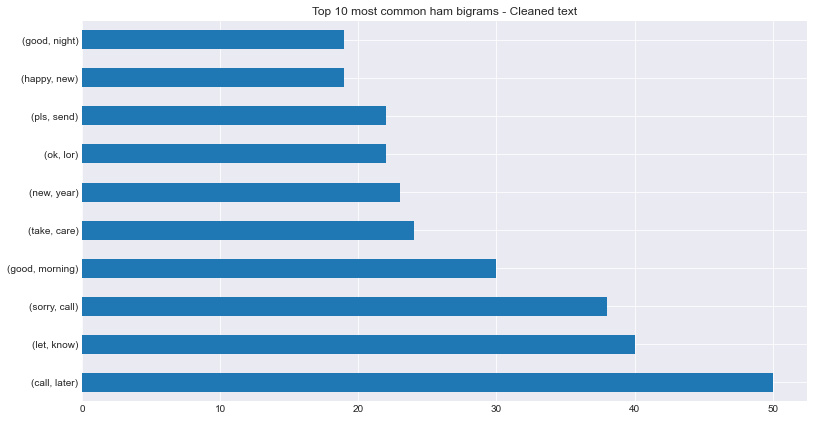

In [22]:
pd.Series(nltk.bigrams(clean_ham_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common ham bigrams - Cleaned text')

Text(0.5, 1.0, 'Top 10 most common spam bigrams - Lemmatized  text')

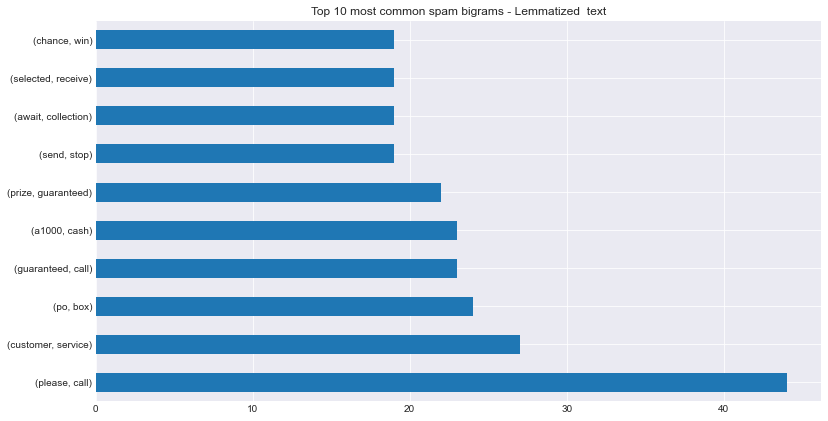

In [23]:
pd.Series(nltk.bigrams(lemmatized_spam_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam bigrams - Lemmatized  text')

Text(0.5, 1.0, 'Top 10 most common ham bigrams - Lemmatized  text')

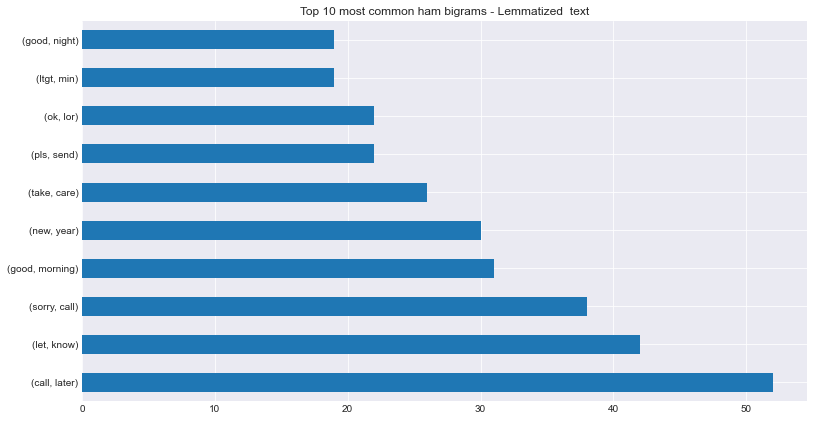

In [24]:
pd.Series(nltk.bigrams(lemmatized_ham_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common ham bigrams - Lemmatized  text')

In [25]:
from wordcloud import WordCloud


Text(0.5, 1.0, 'Word Cloud Spam')

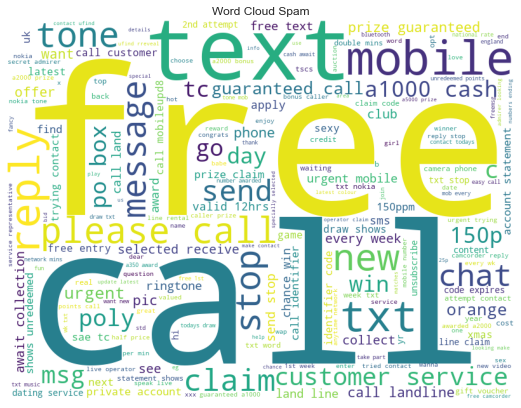

In [26]:
spam_img = WordCloud(background_color='white', width=800, height=600).generate(clean_spam_words)
plt.imshow(spam_img)
plt.axis('off')
plt.title('Word Cloud Spam')

Text(0.5, 1.0, 'Word Cloud Spam')

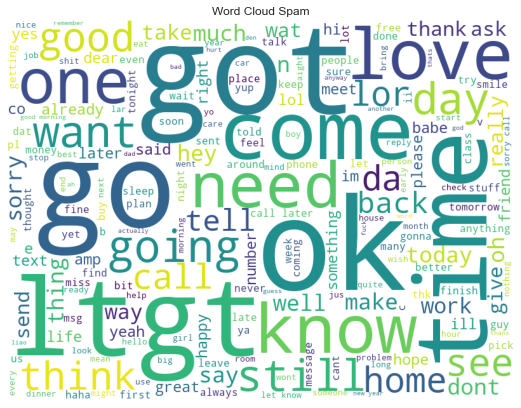

In [27]:
ham_img = WordCloud(background_color='white', width=800, height=600).generate(clean_ham_words)
plt.imshow(ham_img)
plt.axis('off')
plt.title('Word Cloud Spam')

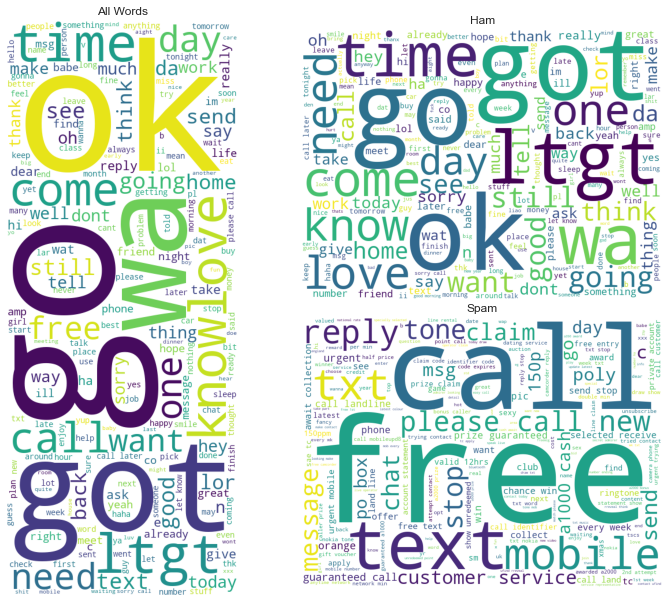

In [28]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(lemmatized_all_words)
ham_cloud = WordCloud(background_color='white', height=600, width=800).generate(lemmatized_ham_words)
spam_cloud = WordCloud(background_color='white', height=600, width=800).generate(lemmatized_spam_words)

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(ham_cloud)
axs[2].imshow(spam_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Ham')
axs[2].set_title('Spam')

for ax in axs: ax.axis('off')

In [29]:
def show_counts_and_ratios(df, column):
    """
    Takes in a dataframe and a string of a single column
    Returns a dataframe with absolute value counts and percentage value counts
    """
    labels = pd.concat([df[column].value_counts(),
                    df[column].value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    labels
    return labels

show_counts_and_ratios(df, "label")

,n,percent
ham,4825,0.865937
spam,747,0.134063


<li>Is there any overlap in the bigrams for the spam data and the ham data?</li>


No overlap in the top ten - but likely farther down the list

<li>Create and explore with trigrams (i.e. a n-gram with an n of 3) for both
   the spam and ham data.</li>


In [30]:
from nltk import ngrams

n = 3
spam_trigrams = pd.Series(ngrams(lemmatized_spam_words.split(), n))
ham_trigrams = pd.Series(ngrams(lemmatized_ham_words.split(), n))

Text(0.5, 1.0, 'Top 10 most common spam Tri - Lemmatized  text')

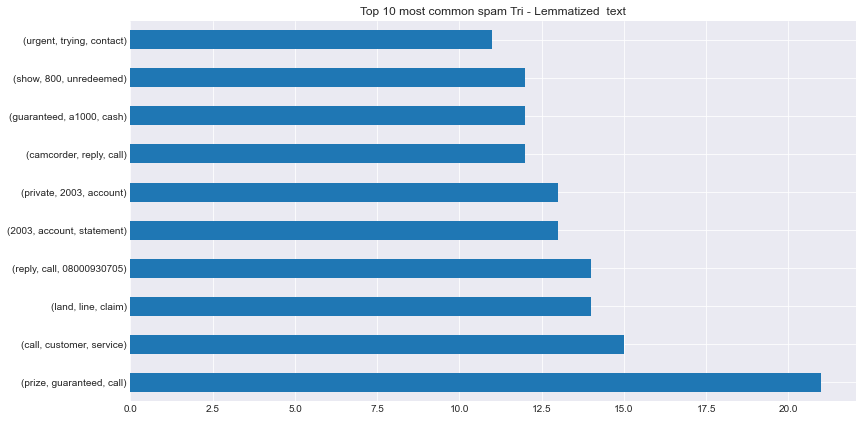

In [31]:
spam_trigrams.value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam Tri - Lemmatized  text')

Text(0.5, 1.0, 'Top 10 most common spam Tri - Lemmatized  text')

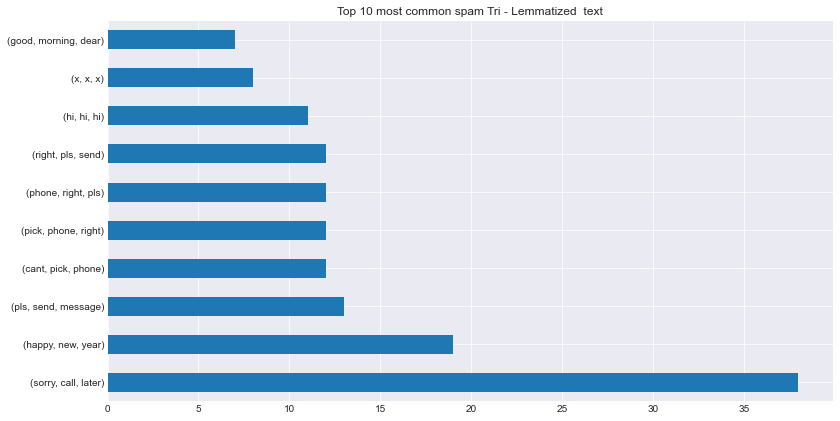

In [32]:
ham_trigrams.value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam Tri - Lemmatized  text')

In [33]:
df.head()

,label,original,clean,stemmed,lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,go jurong point crazi avail onli bugi n great ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif oni,ok lar joke wif oni,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts 21s...,free entri wkli comp win fa cup final tkt 21st...,free entry wkly comp win fa cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,dun say early hor c already say,dun say earli hor c alreadi say,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,nah think goe usf live around though,nah think go usf life around though


In [34]:
#! pip install scattertext


In [35]:
import scattertext as st

In [36]:
analyze_col = "clean"

filtered_df = df.copy()

# Tokenize text
filtered_df["parse"] = filtered_df[analyze_col].apply(st.whitespace_nlp_with_sentences)

In [37]:
filtered_df.head()

,label,original,clean,stemmed,lemmatized,parse
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,go jurong point crazi avail onli bugi n great ...,go jurong point crazy available bugis n great ...,"(go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif oni,ok lar joke wif oni,ok lar joking wif oni,"(ok, lar, joking, wif, oni)"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts 21s...,free entri wkli comp win fa cup final tkt 21st...,free entry wkly comp win fa cup final tkts 21s...,"(free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,dun say early hor c already say,dun say earli hor c alreadi say,dun say early hor c already say,"(dun, say, early, hor, c, already, say)"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,nah think goe usf live around though,nah think go usf life around though,"(nah, think, goes, usf, lives, around, though)"


In [38]:
corpus = (
    st.CorpusFromParsedDocuments(filtered_df, category_col="label", parsed_col="parse")
    .build()
    .get_unigram_corpus()
    .compact(st.AssociationCompactor(2000))
)


In [39]:
nltk.download("averaged_perceptron_tagger")

# get DataFrame with terms and their frequency
term_freq_df = corpus.get_term_freq_df()

# Get scaled F-scores of each term in each category
term_freq_df["Ham Score"] = corpus.get_scaled_f_scores("ham")
term_freq_df["Spam Score"] = corpus.get_scaled_f_scores("spam")

# Remove terms that are not nouns
def is_noun(word: str):
    pos = nltk.pos_tag([word])[0][1]
    return pos[:2] == "NN"

term_freq_df = term_freq_df.loc[map(is_noun, term_freq_df.index)]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jaredgodar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [40]:
term_freq_df.sort_values(by="Ham Score", ascending=False).index[:30]


Index(['ltgt', 'lor', 'da', 'home', 'oh', 'ok', 'sorry', 'wat', 'think', 'way',
       'love', 'hey', 'need', 'hope', 'night', 'work', 'n', 'day', 'ask',
       'dont', 'time', 'right', 'yeah', 'hi', 'amp', 'tell', 'pls', 'today',
       'r', 'want'],
      dtype='object', name='term')

In [41]:
term_freq_df.sort_values(by="Spam Score", ascending=False).index[:30]


Index(['claim', 'prize', 'guaranteed', 'tone', 'urgent', 'nokia', 'service',
       'a1000', 'txt', 'mobile', 'a2000', 'draw', 'landline', 'win',
       'customer', 'camera', 'cash', 'contact', 'code', 'receive', 'award',
       'video', 'a150', 'line', 'po', 'shows', 'ringtone', 'entry',
       'collection', 'tc'],
      dtype='object', name='term')

In [42]:
html = st.produce_scattertext_explorer(
    corpus,
    category="ham",
    category_name="ham",
    not_category_name="spa,",
    minimum_term_frequency=5,
    pmi_threshold_coefficient=0,
    width_in_pixels=1000,
    #metadata=corpus.get_df()["page_host"],
    transform=st.Scalers.dense_rank,
)
open("ham_vs_spam.html", "w").write(html)

957653

In [43]:
from IPython.display import HTML


![graph](ham_vs_spam.png)

   
3. Explore the news articles using the techniques discussed in the exploration
   lesson. Use the <code>category</code> variable when exploring.</p>
</li>
</ol>


In [44]:
import acquire_inshots

In [45]:
df = acquire_inshots.get_articles()

/Users/jaredgodar/codeup-data-science/natural-language-processing-exercises/acquire_inshots.py:29: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 29 of the file /Users/jaredgodar/codeup-data-science/natural-language-processing-exercises/acquire_inshots.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)


Results saved to CSV file


In [46]:
df.category.value_counts()

business         25
sports           25
technology       25
entertainment    25
Name: category, dtype: int64

In [47]:
df.head()

,title,author,body,date,category
0,LIC files draft papers with SEBI to seek appro...,Pragya Swastik,State-run Life Insurance Corporation of India ...,13 Feb 2022,business
1,13-yr-old girl gets ₹50 lakh funding on Shark ...,Ridham Gambhir,A Class 8 girl became the youngest contestant ...,13 Feb 2022,business
2,"What is the ₹22,842 cr ABG Shipyard case, bigg...",Pragya Swastik,The CBI in its biggest bank fraud case booked ...,13 Feb 2022,business
3,Retail inflation rises to 7-month-high of 6.01...,Pragya Swastik,The retail inflation accelerated to a seven-mo...,14 Feb 2022,business
4,"All men die, not all men truly live: Rajiv Baj...",Pragya Swastik,"Bajaj Auto MD Rajiv Bajaj, the son of industri...",13 Feb 2022,business


In [48]:
import prepare_spam

In [59]:
df=prepare_spam.prep_news_data(df, 'body', extra_words = ["'", '1', '10', "10080", '10229', '1033', '1075', '11', '115', '1296', '1356', '14', '1400', '1420', '143787','14935', '15', '1500', '16'])

In [53]:
df.category.value_counts()

business         25
sports           25
technology       25
entertainment    25
Name: category, dtype: int64

In [60]:
# Split out word lists

# combine all messages in single string by cotegory
lemmatized_business_words =(' '.join(df[df.category == 'business'].lemmatized))
lemmatized_sports_words =(' '.join(df[df.category == 'sports'].lemmatized))
lemmatized_technology_words =(' '.join(df[df.category == 'technology'].lemmatized))
lemmatized_entertainment_words =(' '.join(df[df.category == 'entertainment'].lemmatized))

lemmatized_all_words = (' '.join(df.lemmatized))

In [61]:
lemmatized_business_freq = pd.Series(lemmatized_business_words.split()).value_counts()
    
lemmatized_sports_freq = pd.Series(lemmatized_sports_words.split()).value_counts()

lemmatized_technology_freq =pd.Series(lemmatized_technology_words.split()).value_counts()

lemmatized_entertainment_freq = pd.Series(lemmatized_entertainment_words.split()).value_counts()

lemmatized_all_freq = pd.Series(lemmatized_all_words.split()).value_counts()

In [62]:
word_counts = (pd.concat([lemmatized_all_freq, lemmatized_business_freq, lemmatized_sports_freq, lemmatized_technology_freq, lemmatized_entertainment_freq], axis=1, sort=True)
                .set_axis(['all', 'business', 'sports', 'technology', 'entertainment'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head(20)

,all,business,sports,technology,entertainment
13yearold,1,1,0,0,0
16842,1,1,0,0,0
16900,1,1,0,0,0
17000mark,1,1,0,0,0
1747,1,1,0,0,0
1984,1,0,0,0,1
1994,1,1,0,0,0
1995,1,1,0,0,0
1997,1,1,0,0,0
2,5,0,2,2,1


Add punctuation and numbers to stopwords

In [63]:
word_counts.sort_values(by='all', ascending=False).head(10)


,all,business,sports,technology,entertainment
said,73,13,17,17,26
ha,40,4,17,10,9
wa,39,5,19,4,11
india,32,15,6,9,2
crore,32,20,12,0,0
added,28,3,11,6,8
ipl,26,0,26,0,0
film,22,0,0,0,22
2022,21,5,15,1,0
auction,19,0,16,3,0


Text(0.5, 1.0, 'Top 10 most common Business bigrams - Lemmatized text')

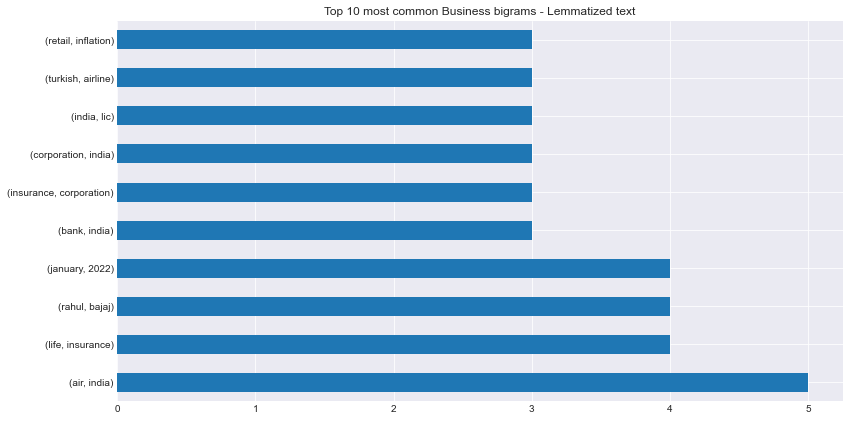

In [76]:
pd.Series(nltk.bigrams(lemmatized_business_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common Business bigrams - Lemmatized text')

Text(0.5, 1.0, 'Top 10 most common Sports bigrams - Lemmatized text')

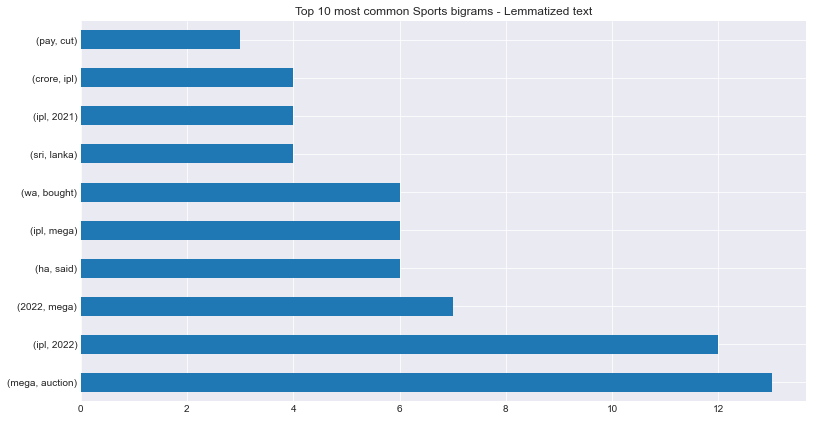

In [77]:
pd.Series(nltk.bigrams(lemmatized_sports_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common Sports bigrams - Lemmatized text')

Text(0.5, 1.0, 'Top 10 most common Technology bigrams - Lemmatized text')

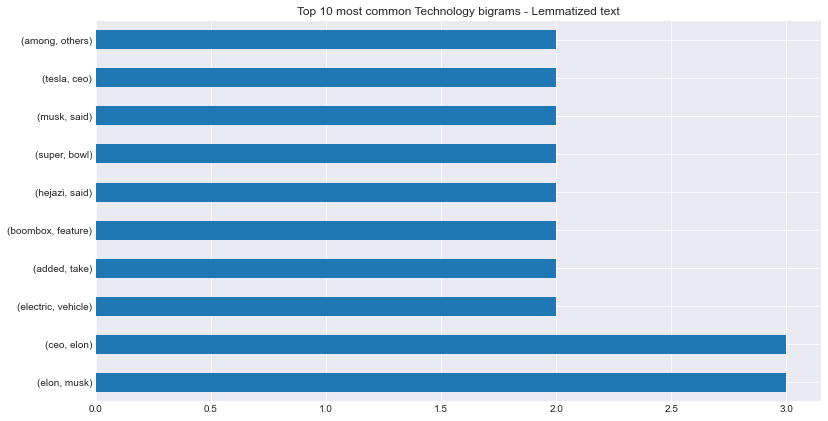

In [79]:
pd.Series(nltk.bigrams(lemmatized_technology_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common Technology bigrams - Lemmatized text')

Text(0.5, 1.0, 'Top 10 most common Technology bigrams - Lemmatized text')

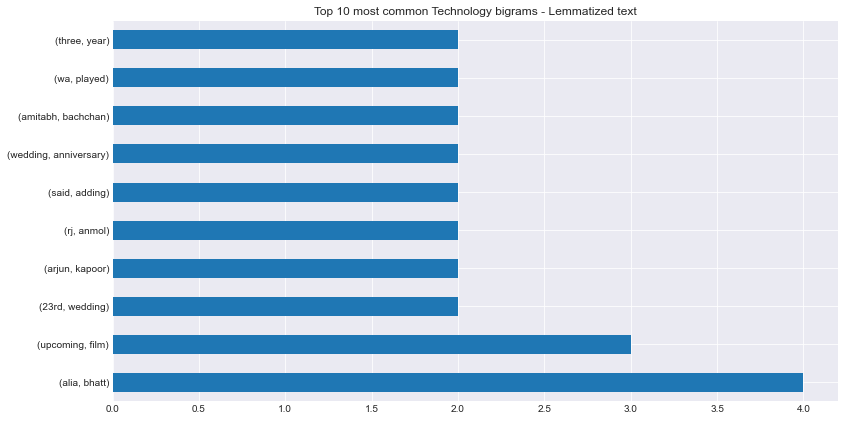

In [80]:
pd.Series(nltk.bigrams(lemmatized_entertainment_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common Technology bigrams - Lemmatized text')

Text(0.5, 1.0, 'Top 10 most common  bigrams - Lemmatized text')

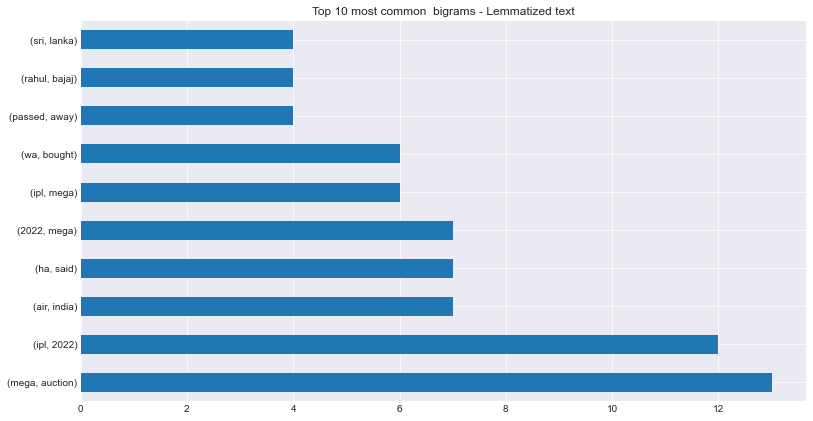

In [81]:
pd.Series(nltk.bigrams(lemmatized_all_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common  bigrams - Lemmatized text')

Text(0.5, 1.0, 'Word Cloud Business')

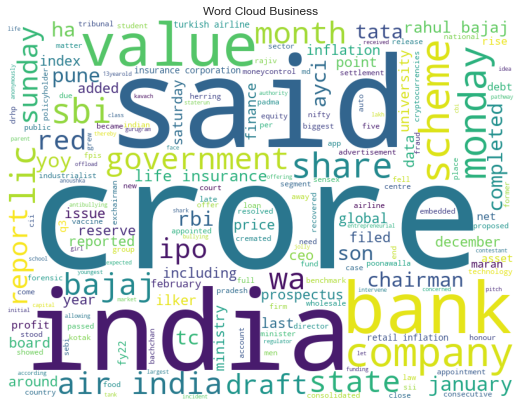

In [85]:
business_img = WordCloud(background_color='white', width=800, height=600).generate(lemmatized_business_words)
plt.imshow(business_img)
plt.axis('off')
plt.title('Word Cloud Business')

Text(0.5, 1.0, 'Word Cloud Sports')

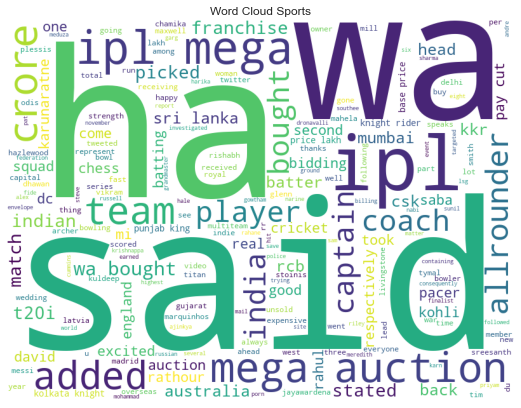

In [84]:
sports_img = WordCloud(background_color='white', width=800, height=600).generate(lemmatized_sports_words)
plt.imshow(sports_img)
plt.axis('off')
plt.title('Word Cloud Sports')

Text(0.5, 1.0, 'Word Cloud Entertainment')

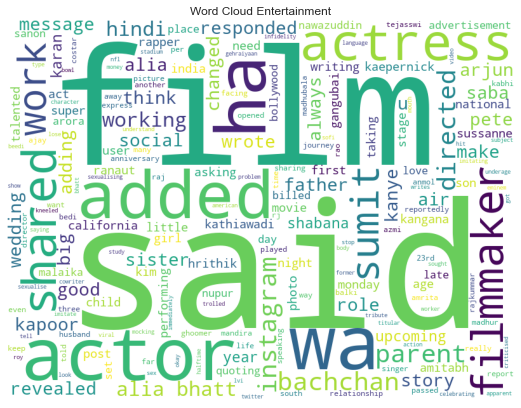

In [87]:
entertainment_img = WordCloud(background_color='white', width=800, height=600).generate(lemmatized_entertainment_words)
plt.imshow(entertainment_img)
plt.axis('off')
plt.title('Word Cloud Entertainment')

Text(0.5, 1.0, 'Word Cloud technology')

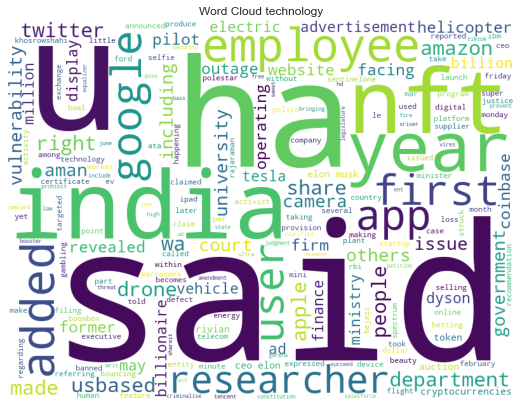

In [88]:
technology_img = WordCloud(background_color='white', width=800, height=600).generate(lemmatized_technology_words)
plt.imshow(technology_img)
plt.axis('off')
plt.title('Word Cloud technology')

Text(0.5, 1.0, 'Word Cloud - All Words')

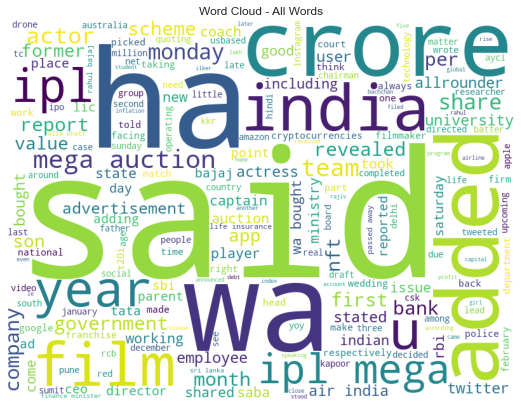

In [89]:
all_img = WordCloud(background_color='white', width=800, height=600).generate(lemmatized_all_words)
plt.imshow(all_img)
plt.axis('off')
plt.title('Word Cloud - All Words')